In [2]:
%matplotlib inline
import numpy as np
import torch

import sys 
sys.path.insert(0,'..')
from utils.dataset import HandwritingDataset
from utils import plot_stroke
from utils.data_utils import data_denormalization
from utils.constants import Global

In [3]:
data_path = '../data/'
traindata = HandwritingDataset(data_path, split='train', text_req=False, debug=False)
validdata = HandwritingDataset(data_path, split='valid', text_req=False, debug=False)

In [4]:
print('Size of train dataset: {}'.format(len(traindata)))
print('Size of valid dataset: {}'.format(len(validdata)))

Size of train dataset: 5400
Size of valid dataset: 600


In [5]:
print('Shape of train dataset: {}'.format(traindata.dataset.shape))

Shape of train dataset: (5400, 1191, 3)


In [26]:
idx = 10
input_seq, target, mask = traindata[idx]
print(input_seq.shape)

torch.Size([300, 3])


Normalized data


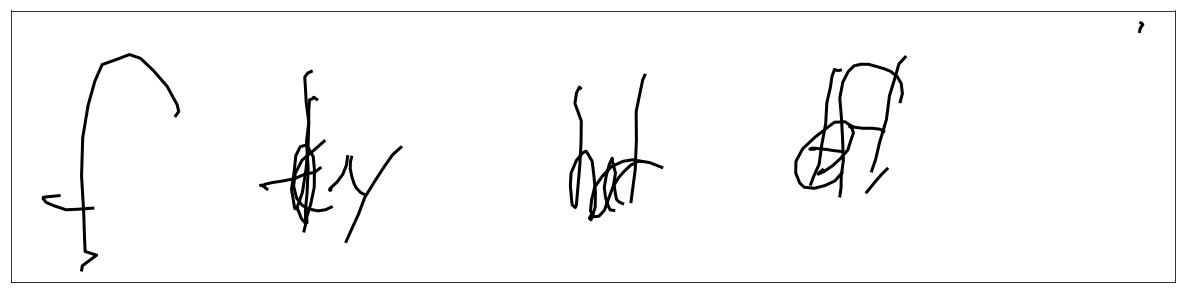

In [28]:
print('Normalized data')
plot_stroke(input_seq.numpy())
# print(input_seq)

(1, 300, 3)
Train mean: [ 0.2233514  -0.00329868] 
 Train std: [1.5324014 1.3595682]
Denormalized data


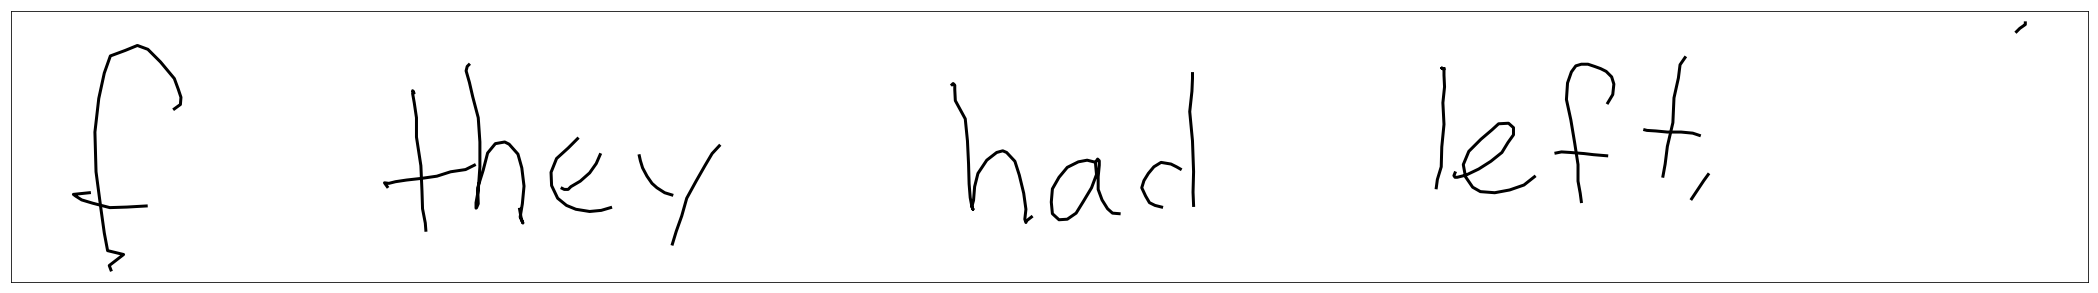

In [29]:
stroke = input_seq.unsqueeze(0).numpy()
print(stroke.shape)
print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))
denor_stroke_seq = data_denormalization(Global.train_mean, Global.train_std, stroke)
print('Denormalized data')
# print(denor_stroke_seq)
plot_stroke(denor_stroke_seq[0])

In [30]:
_traindata = HandwritingDataset(data_path, split='train', text_req=True, debug=False)
_validdata = HandwritingDataset(data_path, split='valid', text_req=True, debug=False)

In [31]:
print('Size of train dataset: {}'.format(len(_traindata)))
print('Size of valid dataset: {}'.format(len(_validdata)))

Size of train dataset: 5400
Size of valid dataset: 600


In [32]:
print('Shape of train dataset: {}'.format(_traindata.dataset.shape))

Shape of train dataset: (5400, 1191, 3)


In [41]:
idx = 20
input_seq, target, mask, text, char_mask = _traindata[idx]
print(input_seq.shape)
text_seq = _traindata.idx_to_char(text.long().numpy())
text_str = ''.join(text_seq)

print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))

torch.Size([300, 3])
Text:  however, the new and                                            
Train mean: [ 0.22342502 -0.0032705 ] 
 Train std: [1.5320472 1.3616941]


Normalized data
Text:  however, the new and                                            


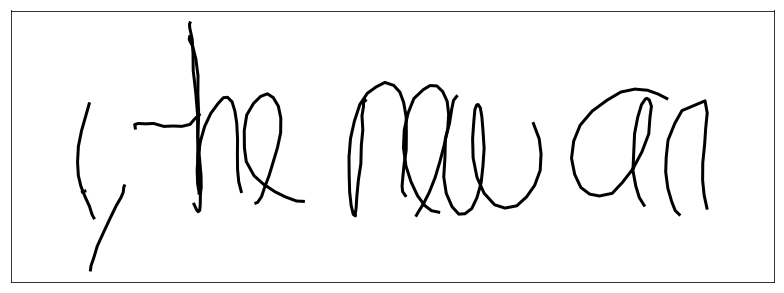

In [43]:
print('Normalized data')
print("Text: ", text_str)
plot_stroke(input_seq.numpy())
# print(input_seq)

(1, 300, 3)
Train mean: [ 0.22342502 -0.0032705 ] 
 Train std: [1.5320472 1.3616941]
Denormalized data


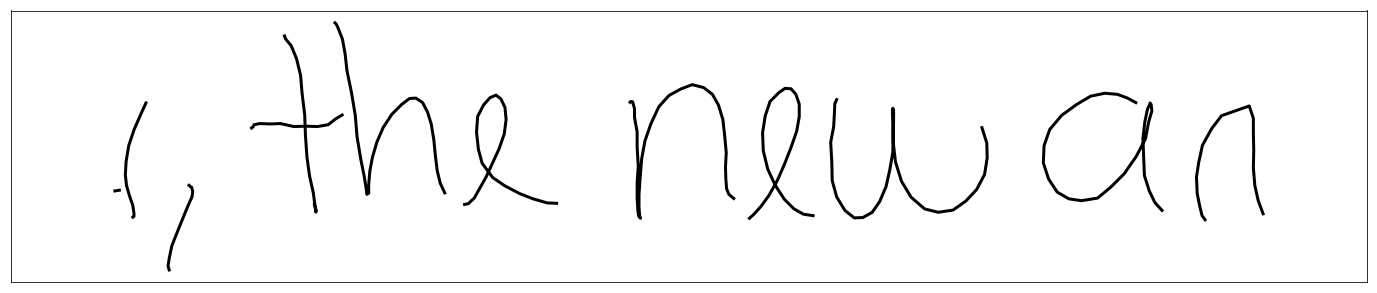

In [44]:
stroke = input_seq.unsqueeze(0).numpy()
print(stroke.shape)
print('Train mean: {} \n Train std: {}'.format(Global.train_mean, Global.train_std))
denor_stroke_seq = data_denormalization(Global.train_mean, Global.train_std, stroke)
print('Denormalized data')
# print(denor_stroke_seq)
plot_stroke(denor_stroke_seq[0])

In [45]:
mean = denor_stroke_seq[:, :, 1:].mean(axis=(0, 1))
denor_stroke_seq[:, :, 1:] -= mean
std = denor_stroke_seq[:, :, 1:].std(axis=(0, 1))
denor_stroke_seq[:, :, 1:] /= std
print(denor_stroke_seq[:, :, 1:].mean(axis=(0, 1)), denor_stroke_seq[:, :, 1:].std(axis=(0, 1)))
# print('Normalized stroke for mean 0 and std 1 \n{}'.format(denor_stroke_seq))

[-9.1890495e-09 -2.1060307e-08] [0.9999997 1.0000002]


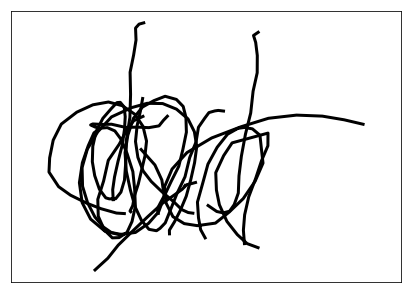

In [46]:
plot_stroke(denor_stroke_seq[0])